<a href="https://colab.research.google.com/github/Iceoid/datascience-ml-class/blob/main/TP4_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Random Dataset Generation
We will generate random, noisy dataset using a predefined function. This function is a combination of a 2nd degree polynomial with a sine function, plus some noise.

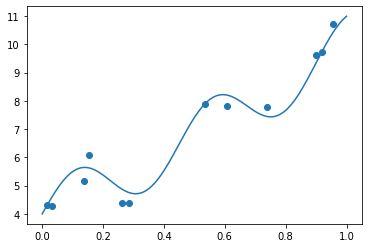

In [ ]:
def synthetic_function(x, noise=0):
    return x + (x+2)**2 + np.sin(14*x) + noise * (np.random.random(x.shape) - 0.5)

def get_data_range(min=0, max=1, num=1000, noise=0):
    X = np.linspace(min, max, num=num).reshape((num, 1))
    return X, synthetic_function(X, noise)

def get_data_random(min=0, max=1, num=12, noise=1):
    X = np.random.random(size=(num, 1)) * (max - min) + min
    return X, synthetic_function(X, noise)

np.random.seed(12)
X, Y = get_data_random()
Xr, Yr = get_data_range()
plt.scatter(X, Y)
plt.plot(Xr, Yr)
plt.show()

## Linear Regression
Implement the `predict` and `fit` methods for linear regression (without regularization!)

In [ ]:
def homogeneous(X):
    return np.insert(X, 0, 1, axis=-1)

class LinearRegression:
    def __init__(self):
        self.W = None

    # Predicts output values using X
    def predict(self, X):
        Xh = homogeneous(X) # Homogeneous coordinates
        return self.W.dot(Xh.T).T

    # Trains the model using X and Y
    def fit(self, X, Y):
        Xh = homogeneous(X) # Homogeneous coordinates
        self.W = np.linalg.inv(Xh.T.dot(Xh)).dot(Xh.T).dot(Y).T
        return self

Now, we can visualize what the learned function looks like.

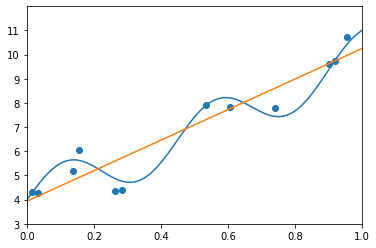

In [ ]:
# Create and fit a linear regression model
lr = LinearRegression()
lr.fit(X, Y)

# Limit the plot size
plt.xlim(np.min(Xr), np.max(Xr))
plt.ylim(np.min(Yr) - 1, np.max(Yr) + 1)

# Plot the training data with the true function.
plt.scatter(X, Y)
plt.plot(Xr, Yr)

# Plot the predicted function
plt.plot(Xr, lr.predict(Xr))

plt.show()

## Linear Regression with Regularization
Implement the `predict` and `fit` methods for linear regression with regularization.

The regularization factor is denoted as `reg` and $\lambda$.

In [ ]:
class RegularizedLinearRegression:
    def __init__(self):
        self.W = None

    # Predicts output values using X
    def predict(self, X):
        Xh = homogeneous(X) # Homogeneous coordinates
        return self.W.dot(Xh.T).T

    # Trains the model using X and Y
    def fit(self, X, Y, reg=0):
        Xh = homogeneous(X) # Homogeneous coordinates
        I = np.identity(Xh.shape[1]) # Identity Matrix
        I[0, 0] = 0 # Don't regularize bias

        innerW = Xh.T.dot(Xh)
        self.W = np.linalg.inv(innerW + (I * reg)).dot(Xh.T).dot(Y).T
        return self

We can now visualize the learned function as we increase $\lambda$, what do you notice? Discuss.
*   Higher $\lambda$ values favour smaller slopes. When it is too high, we get a constant predictor.

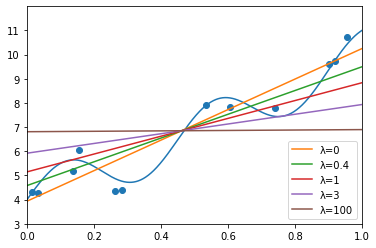

In [ ]:
# Create a linear regression model
lr = RegularizedLinearRegression()

# Limit the plot size
plt.xlim(np.min(Xr), np.max(Xr))
plt.ylim(np.min(Yr) - 1, np.max(Yr) + 1)

# Plot the training data with the true function.
plt.scatter(X, Y)
plt.plot(Xr, Yr)

# Plot the predicted functions
for reg in [0, 0.4, 1, 3, 100]:
    lr.fit(X, Y, reg=reg)
    plt.plot(Xr, lr.predict(Xr), label=f"λ={reg}")

plt.legend(loc='lower right')
plt.show()

## Explicit Mapping and Regularization
We will define the polynomial mapping as seen in the slides.

In [ ]:
def polyn(X, p=2):
    X = X.astype(np.float64)
    return np.array([[x**(k+1) for k in range(p)] for x in X]).squeeze(axis=-1)

print("A few examples for p=4:")
for i in range(5):
    val = np.array([[i]])
    print(val, "->", polyn(val, p=4))

A few examples for p=4:
[[0]] -> [[0. 0. 0. 0.]]
[[1]] -> [[1. 1. 1. 1.]]
[[2]] -> [[ 2.  4.  8. 16.]]
[[3]] -> [[ 3.  9. 27. 81.]]
[[4]] -> [[  4.  16.  64. 256.]]


We can now visualize the learned function as we increase $p$, what do you notice? What can you say about the variance? Discuss.

Note: Here we show 20 learned functions in one plot, each time sampling and training on different examples.
*   The model capacity increases as we increase $p$. When it is too high, we see overfitting, and when it is too low, we start to underfit.

p = 3


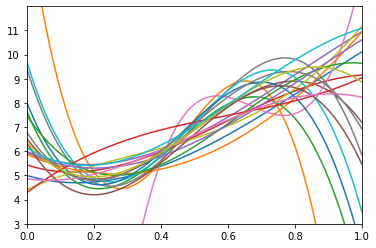

p = 5


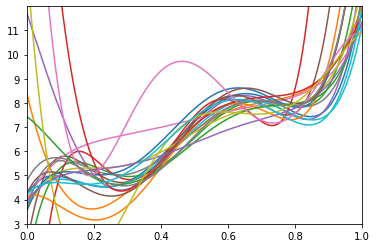

p = 7


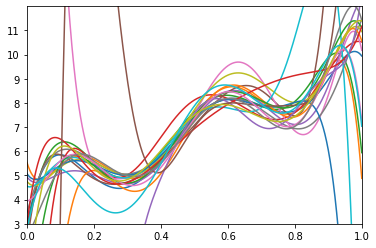

p = 9


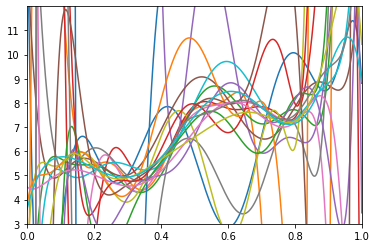

In [ ]:
lr = LinearRegression()

for p in [3, 5, 7, 9]:

    # Limit the plot size
    plt.xlim(np.min(Xr), np.max(Xr))
    plt.ylim(np.min(Yr) - 1, np.max(Yr) + 1)

    for i in range(20):
        X, Y = get_data_random()
        lr.fit(polyn(X, p), Y)
        plt.plot(Xr, lr.predict(polyn(Xr, p)))
    print("p =", p)
    plt.show()


Let's now visualize the learned function as we increase $\lambda$ instead, with a fixed $p=9$, what do you notice? What can you say about the variance? Discuss.

Note: Here we show 20 learned functions in one plot, each time sampling and training on different examples.
*   The model variance decreases as we increase $\lambda$. When it is too low, we see overfitting, and when it is too high, we start to underfit.



λ = 1e-100


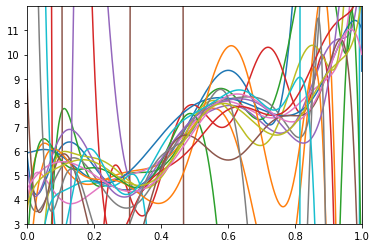

λ = 1e-12


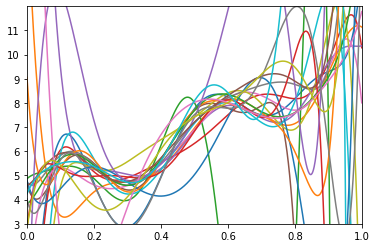

λ = 1e-05


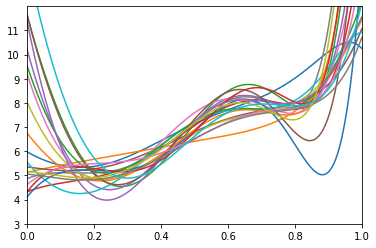

λ = 0.001


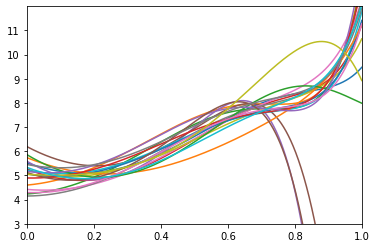

In [ ]:
lr = RegularizedLinearRegression()

for reg in [1e-100, 1e-12, 1e-5, 1e-3]:

    # Limit the plot size
    plt.xlim(np.min(Xr), np.max(Xr))
    plt.ylim(np.min(Yr) - 1, np.max(Yr) + 1)

    for i in range(20):
        X, Y = get_data_random()
        lr.fit(polyn(X, p=9), Y, reg=reg)
        plt.plot(Xr, lr.predict(polyn(Xr, p=9)))
    print("λ =", reg)
    plt.show()

## Linear Classification (Logistic Regression)
We will generate random, noisy dataset using a predefined function.

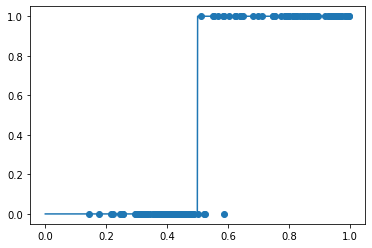

In [ ]:
def synthetic_function(x):
    return (x > 0.5).astype(np.float64)

def get_data_range(min=0, max=1, num=1000, noise=0):
    X = np.linspace(min, max, num=num).reshape((num, 1))
    return X, synthetic_function(X)

def get_data(min=0.1, max=0.9, num=50, noise=0.2):
    X = np.random.random(size=(num, 1)) * (max - min) + min
    X = np.append(X, np.random.random(size=(num, 1)) * 0.2 + 0.3, axis=0)
    X = np.append(X, np.random.random(size=(num, 1)) * 0.2 + 0.8, axis=0)
    Y = synthetic_function(X)
    X[:num] = X[:num] + (np.random.random(size=(num, 1)) - 0.5) * noise
    return X, Y

np.random.seed(20)
X, Y = get_data()
Xr, Yr = get_data_range()
plt.scatter(X, Y)
plt.plot(Xr, Yr)
plt.show()

Let's try linear regression on this dataset. The orange line is the learned affine function, and the green line is the decision boundary $(y=0.5)$. What do you notice? Discuss.
*   The linear regression model is being pulled by values to the right of the graph, thus giving a skewed decision boundary.



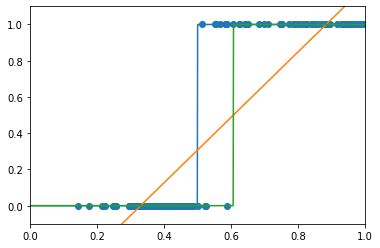

In [ ]:
# Create and fit a linear regression model
lr = LinearRegression()
lr.fit(X, Y)

# Limit the plot size
plt.xlim(np.min(Xr), np.max(Xr))
plt.ylim(-0.1, 1.1)

# Plot the training data with the true function.
plt.scatter(X, Y)
plt.plot(Xr, Yr)

# Plot the predicted function
plt.plot(Xr, lr.predict(Xr))
plt.plot(Xr, (lr.predict(Xr) > 0.5).astype(np.float))
plt.show()

As linear regression is not optimal for classification tasks, implement the logistic regression method as seen in the slides.

In [ ]:
# Sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

class LogisticRegression:
    def __init__(self):
        self.W = None

    # Predicts output values using X
    def predict(self, X):
        Xh = homogeneous(X) # Homogeneous coordinates
        return sigmoid(self.W.dot(Xh.T).T)

    # Returns the batch gradient for X and Y.
    def grad(self, X, Y):
        Xh = homogeneous(X) # Homogeneous coordinates
        return np.average(Xh * (self.predict(X) - Y), axis=0)

    # Trains the model using X and Y
    def fit(self, X, Y, lr=1, iters=100000, rand_sigma=0.1):
        Xh = homogeneous(X) # Homogeneous coordinates
        # Initialize randomly the weights
        self.W = np.random.normal(0, scale=rand_sigma, size=(Y.shape[1], Xh.shape[1]))

        for i in range(iters):
            self.W = self.W - lr * self.grad(X, Y)
        return self

Now let's try logistic regression. The orange curve is the learned sigmoid function.

Is the predicted decision boundary (green line) closer to the true boundary (blue line)? Why? Discuss.
*   The logistic regression classifier is much less sensitive to outer values than linear regression. Values further from the decision boundary will not affect the logistic regression as much as linear regression.



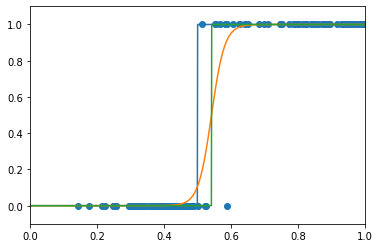

In [ ]:
# Create and fit a logistic regression model
lr = LogisticRegression()
lr.fit(X, Y)

# Limit the plot size
plt.xlim(np.min(Xr), np.max(Xr))
plt.ylim(-0.1, 1.1)

# Plot the training data with the true function.
plt.scatter(X, Y)
plt.plot(Xr, Yr)

# Plot the predicted function
plt.plot(Xr, lr.predict(Xr))
plt.plot(Xr, (lr.predict(Xr) > 0.5).astype(np.float))